## WEIGHT INITIALIZATIONS

Dataset successfully saved to 'moons_classification_data.csv'

First 5 rows of the dataset:
   feature1  feature2  target
0 -1.078161  0.063368       0
1  0.939809  0.457119       0
2  0.695151  0.642107       0
3  1.150173 -0.347871       1
4  0.249173 -0.068544       1


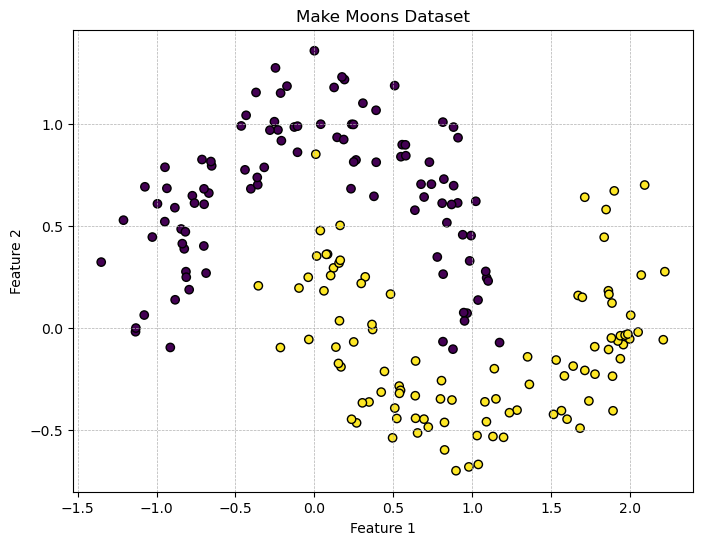

In [1]:
#XAVIER 
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt

# Generate the make_moons dataset
# n_samples: The total number of points generated.
# shuffle: Whether to shuffle the samples.
# noise: Standard deviation of Gaussian noise added to the data.
# random_state: Determines random number generation for dataset creation.
X, y = make_moons(n_samples=200, shuffle=True,
                    noise=0.15, random_state=42)

# Create a pandas DataFrame from the generated data
# X[:, 0] is the first feature
# X[:, 1] is the second feature
# y is the target label (0 or 1)
moons_df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing row indices into the CSV file
file_path = 'moons_classification_data.csv'
moons_df.to_csv(file_path, index=False)

print(f"Dataset successfully saved to '{file_path}'")

# Optional: Display the first few rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
print(moons_df.head())

# Optional: Plot the data to visualize it
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [3]:
df=pd.read_csv('moons_classification_data.csv')
df.head()

,feature1,feature2,target
0,-1.078161,0.063368,0
1,0.939809,0.457119,0
2,0.695151,0.642107,0
3,1.150173,-0.347871,1
4,0.249173,-0.068544,1


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[-0.5356704 , -0.5557358 , -0.5419594 , -0.6006774 , -0.23752984,
          0.08134794, -0.02894849, -0.432515  ,  0.6565508 ,  0.44925457],
        [-0.62072206,  0.5746284 , -0.6793467 , -0.39104182,  0.03337443,
          0.29621106,  0.4358874 ,  0.4464417 ,  0.39603215,  0.13401854]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 3.50371540e-01, -3.72212410e-01, -6.25451505e-02,
         -3.18618894e-01, -3.51191640e-01, -5.42010069e-02,
          8.09088349e-02,  2.33273447e-01,  5.24134755e-01,
         -3.77526283e-02],
        [-3.37957442e-01,  5.10747433e-01,  5.12290239e-01,
         -3.53544056e-01, -2.47467518e-01, -6.21983111e-02,
          4.30406928e-01, -2.37785637e-01, -1.16100013e-01,
          3.45104098e-01],
        [-2.31252909e-02,  9.79572535e-03,  4.67904687e-01,
          1.83220267e-01, -3.09145570e-01,  2.88543224e-01,
          2.43819714e-01,  5.11955619e-02,  3.31699848e-04,
          4.9319589

In [8]:
initial_weights = model.get_weights()

In [9]:
import numpy as np

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.11795232,  0.21155116,  0.68061215,  0.10199519,  0.19788298,
          0.32237437,  0.5201472 , -0.8850825 , -0.15237415, -0.95739883],
        [-0.07688414, -0.08632426,  0.554985  ,  0.44748375, -0.17050003,
          0.8082668 ,  0.21173011, -0.49508393, -0.82728595,  0.97488904]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03274429,  0.31118757,  0.4782953 , -0.17893057,  0.22189757,
          0.6116766 , -0.37580824,  0.16974983, -0.05842461,  0.08115807],
        [ 0.10960484, -0.23591484, -0.06323585, -0.05966647,  0.43295625,
         -0.19890681, -0.18694267, -0.4764263 , -0.04844738,  0.6765174 ],
        [-0.34549224,  0.42678252, -0.17270234, -0.331714  ,  0.24894711,
         -0.02543024, -0.20826513,  0.3458438 , -0.18260586, -0.72965014],
        [ 0.10336076,  0.2897958 , -0.1591816 ,  0.5047618 , -0.2832727 ,
         -0.05919668, -0.7902902 , -0.15258946, -0.02362444, -0.04649426],
        [ 0.67349

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6808 - loss: 0.6485 - val_accuracy: 0.7500 - val_loss: 0.5243
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6952 - loss: 0.6182 - val_accuracy: 0.7750 - val_loss: 0.5032
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6602 - loss: 0.6057 - val_accuracy: 0.7750 - val_loss: 0.4876
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7007 - loss: 0.5463 - val_accuracy: 0.8000 - val_loss: 0.4742
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7326 - loss: 0.5297 - val_accuracy: 0.8000 - val_loss: 0.4624
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7193 - loss: 0.5343 - val_accuracy: 0.8000 - val_loss: 0.4524
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7361 - loss: 0.4942 - val_accuracy: 0.8250 - val_loss: 0.4421
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7609 - loss: 0.4755 - val_accuracy: 0.8250 - val_loss

In [16]:
model.get_weights()

[array([[-0.37820363,  0.24878016,  1.0062279 , -0.11656199,  0.24542652,
          0.26679042,  0.40688577, -1.1486669 , -0.07966929, -0.7281791 ],
        [ 0.04071474, -0.11913639,  0.40318382,  0.54119927, -0.14585592,
          0.722582  ,  0.1314879 , -0.33411747, -0.9464912 ,  0.9931955 ]],
       dtype=float32),
 array([ 0.44196063,  0.08575403, -0.2711066 ,  0.01089436, -0.11778838,
        -0.11464778, -0.03066107,  0.2684888 ,  0.02042639, -0.1455242 ],
       dtype=float32),
 array([[-0.06582305,  0.26402643,  0.5542179 , -0.27044612,  0.26948428,
          0.6573624 , -0.8075562 ,  0.3073999 ,  0.05327009, -0.04562561],
        [ 0.13565557, -0.3176832 , -0.18958813, -0.2426566 ,  0.29256374,
         -0.10654737, -0.17889075, -0.6256424 , -0.19541608,  0.6481776 ],
        [-0.39553055,  0.59602785, -0.07481485, -0.26990452,  0.3468334 ,
         -0.15563227,  0.13453917,  0.42868143, -0.11944322, -0.69377327],
        [ 0.12276904,  0.36676008, -0.10829618,  0.5594792 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

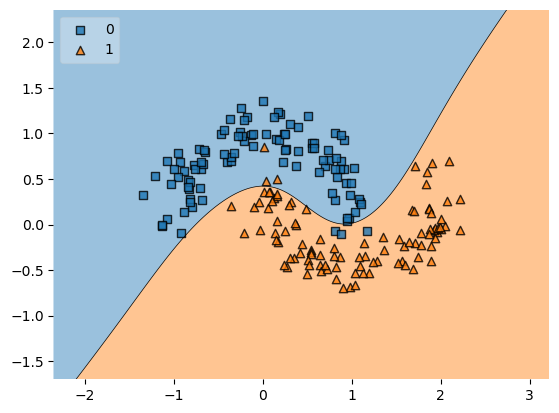

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
model1 = Sequential()

model1.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model1.get_weights()

[array([[ 0.21491562,  1.0834606 ,  0.6743622 , -0.14844345,  0.18963605,
          0.44867605,  0.8369379 , -1.0083072 ,  2.1442618 , -1.3803865 ],
        [-1.3146251 ,  0.7975232 , -0.30604422,  0.78096193, -0.7559015 ,
          0.1736491 ,  0.10931029, -0.45180652, -0.58369875,  1.4569377 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.17974614,  0.16375008, -0.2568447 , -0.1494328 ,  0.5819179 ,
          0.21180683, -0.18767338, -0.12269063, -0.82369536, -0.53421915],
        [-0.78212225,  0.32670963, -0.00874327,  0.24983408,  0.04938939,
         -0.4224037 ,  0.3071642 ,  0.59848595,  0.04642574, -0.08494428],
        [ 0.09193174,  0.11531354, -0.22957075, -0.08656412,  0.7618154 ,
         -0.0363212 , -0.47011328, -0.8517096 ,  0.6472256 ,  0.39309856],
        [ 0.1014649 ,  0.09072766,  0.44882601, -1.0140826 , -0.8458468 ,
         -0.7850932 , -0.04533339,  0.34393433, -0.20458351,  0.22333175],
        [ 0.11140

In [22]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
history = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5836 - loss: 0.6677 - val_accuracy: 0.6750 - val_loss: 0.6091
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5742 - loss: 0.6695 - val_accuracy: 0.7250 - val_loss: 0.5939
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6476 - loss: 0.6476 - val_accuracy: 0.7250 - val_loss: 0.5795
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7124 - loss: 0.6208 - val_accuracy: 0.7500 - val_loss: 0.5642
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7359 - loss: 0.6020 - val_accuracy: 0.8000 - val_loss: 0.5502
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7331 - loss: 0.6041 - val_accuracy: 0.8000 - val_loss: 0.5382
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7767 - loss: 0.5872 - val_accuracy: 0.8000 - val_loss: 0.5300
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7918 - loss: 0.5515 - val_accuracy: 0.8000 - val_loss: 0.5214
Epo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

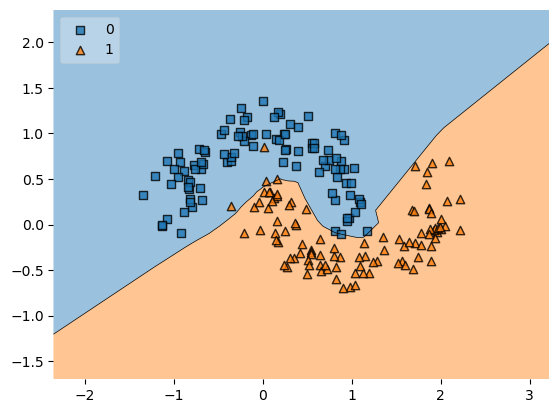

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

#   BATCH NORMALIZATIONS

In [31]:
from keras.layers import BatchNormalization

In [32]:
model2 = Sequential()

model2.add(Dense(3,activation='relu',input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [33]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history2 = model2.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5099 - loss: 0.7036 - val_accuracy: 0.0273 - val_loss: 1.0662
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5570 - loss: 0.6690 - val_accuracy: 0.0364 - val_loss: 0.9701
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5980 - loss: 0.6516 - val_accuracy: 0.0727 - val_loss: 0.9169
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5587 - loss: 0.6377 - val_accuracy: 0.1182 - val_loss: 0.8873
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6126 - loss: 0.6275 - val_accuracy: 0.1818 - val_loss: 0.8437
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6181 - loss: 0.6263 - val_accuracy: 0.2000 - val_loss: 0.8158
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5737 - loss: 0.6341 - val_accuracy: 0.3182 - val_loss: 0.7916
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5680 - loss: 0.6446 - val_accuracy: 0.

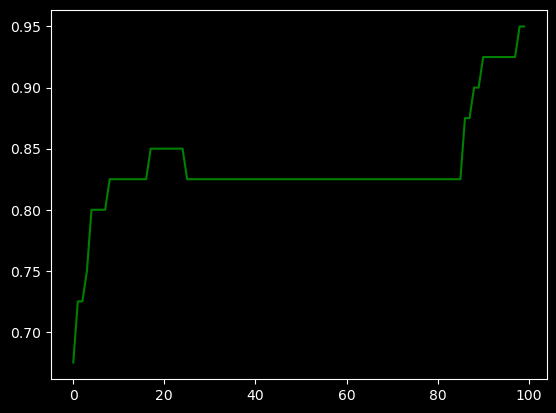

In [35]:
plt.plot(history.history['val_accuracy'],color='green')